In [1]:
# الخلية 1: استيراد المكتبات الضرورية
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

print("تم استيراد المكتبات بنجاح!")

تم استيراد المكتبات بنجاح!


# الخلية 1: استيراد المكتبات
### تستورد جميع المكتبات الأساسية اللازمة لتحليل البيانات، النمذجة، والرسم البياني.

In [2]:
# الخلية 2: تحميل البيانات
file_path = r'C:\Users\fasy\Desktop\sudan_cholera_outbreak_data_extended.csv'
df = pd.read_csv(file_path)

print(f"تم تحميل البيانات بنجاح من: {file_path}")
print(f"عدد الصفوف: {df.shape[0]}، عدد الأعمدة: {df.shape[1]}")
print("\nأول 5 صفوف من البيانات:")
print(df.head())

تم تحميل البيانات بنجاح من: C:\Users\fasy\Desktop\sudan_cholera_outbreak_data_extended.csv
عدد الصفوف: 36540، عدد الأعمدة: 21

أول 5 صفوف من البيانات:
         Date    State Locality_City  Latitude  Longitude  Population_Density  \
0  2020-01-01  الخرطوم       الخرطوم   15.5007    32.5596                2000   
1  2020-01-02  الخرطوم       الخرطوم   15.5007    32.5596                2000   
2  2020-01-03  الخرطوم       الخرطوم   15.5007    32.5596                2000   
3  2020-01-04  الخرطوم       الخرطوم   15.5007    32.5596                2000   
4  2020-01-05  الخرطوم       الخرطوم   15.5007    32.5596                2000   

   Access_to_Clean_Water_Percentage  Poverty_Rate_Percentage  \
0                              65.0                     30.0   
1                              65.0                     30.0   
2                              65.0                     30.0   
3                              65.0                     30.0   
4                              65.0       

# الخلية 2: تحميل البيانات
### تقوم بتحميل البيانات من الجهاز  وقراءتها وعرض اول 5 صفوف منها  

In [3]:
# الخلية 3: استكشاف البيانات (نظرة أولية)

print("معلومات عامة عن البيانات (أنواع الأعمدة والقيم غير المفقودة):")
df.info()

print("\nإحصائيات وصفية للأعمدة الرقمية:")
print(df.describe())

print("\nعدد القيم الفريدة في الأعمدة الفئوية:")
for column in ['State', 'Locality_City', 'Displacement_Status', 'Is_Outbreak']:
    if column in df.columns:
        print(f"- {column}: {df[column].nunique()} قيم فريدة")

print("\nأكثر المدن تكراراً في البيانات:")
print(df['Locality_City'].value_counts().head())

print("\nعدد القيم المفقودة لكل عمود:")
print(df.isnull().sum())

معلومات عامة عن البيانات (أنواع الأعمدة والقيم غير المفقودة):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              36540 non-null  object 
 1   State                             36540 non-null  object 
 2   Locality_City                     36540 non-null  object 
 3   Latitude                          36540 non-null  float64
 4   Longitude                         36540 non-null  float64
 5   Population_Density                36540 non-null  int64  
 6   Access_to_Clean_Water_Percentage  35810 non-null  float64
 7   Poverty_Rate_Percentage           35810 non-null  float64
 8   Sanitation_Access_Rate            35810 non-null  float64
 9   Healthcare_Access_Score           35810 non-null  float64
 10  Displacement_Status               36540 non-null  int64  
 11  Liter

# الخلية 3: استكشاف أولي للبيانات
###   تُقدم هذه الخلية نظرة عامة على بيانات الكوليرا التي تم تحميلها. تتضمن الأعمدة الرئيسية: تاريخ الحالات، الموقع الجغرافي (المدينة والولاية)، عدد الحالات المؤكدة، ومتغير "هل يوجد تفشٍ". كما تحتوي على بيانات مهمة حول الظروف البيئية والمناخية (مثل درجة الحرارة والأمطار)، والعوامل الاقتصادية والصحية (كالكثافة السكانية، معدل الفقر، وتوفر المياه النظيفة والصرف الصحي). يساعدنا هذا الاستعراض الأولي على فهم بنية البيانات وأنواعها، مما يوجه عمليات تنظيف البيانات وهندسة الميزات اللاحقة

In [4]:
# الخلية 4: معالجة أنواع البيانات

# تحويل عمود 'Date' إلى تنسيق تاريخ ووقت
df['Date'] = pd.to_datetime(df['Date'])

# التأكد من أن عمود 'Displacement_Status' و 'Is_Outbreak' هي أرقام صحيحة (0 أو 1)
df['Displacement_Status'] = df['Displacement_Status'].astype(int)
df['Is_Outbreak'] = df['Is_Outbreak'].astype(int)


print("تم تحديث أنواع البيانات لعمود 'Date' و 'Displacement_Status' و 'Is_Outbreak'.")
print("\nمعلومات محدثة عن البيانات:")
df.info()

تم تحديث أنواع البيانات لعمود 'Date' و 'Displacement_Status' و 'Is_Outbreak'.

معلومات محدثة عن البيانات:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              36540 non-null  datetime64[ns]
 1   State                             36540 non-null  object        
 2   Locality_City                     36540 non-null  object        
 3   Latitude                          36540 non-null  float64       
 4   Longitude                         36540 non-null  float64       
 5   Population_Density                36540 non-null  int64         
 6   Access_to_Clean_Water_Percentage  35810 non-null  float64       
 7   Poverty_Rate_Percentage           35810 non-null  float64       
 8   Sanitation_Access_Rate            35810 non-null  float64       
 9   Healthcare

# لخلية 4: تنظيف البيانات
### تعالج القيم المفقودة وتحول أنواع الأعمدة لتهيئتها للتحليل

In [5]:
# الخلية 5: التعامل مع القيم المفقودة (Data Imputation)


for column in df.columns:
    if df[column].isnull().any(): # التحقق مما إذا كان العمود يحتوي على قيم مفقودة
        if df[column].dtype in ['float64', 'int64']: # ملء فقط الأعمدة الرقمية
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"تم ملء القيم المفقودة في عمود '{column}' بالمتوسط: {mean_value:.2f}")

print("\nبعد ملء القيم المفقودة:")
print(df.isnull().sum()) # التحقق مرة أخرى من عدم وجود قيم مفقودة

تم ملء القيم المفقودة في عمود 'Access_to_Clean_Water_Percentage' بالمتوسط: 51.41
تم ملء القيم المفقودة في عمود 'Poverty_Rate_Percentage' بالمتوسط: 50.89
تم ملء القيم المفقودة في عمود 'Sanitation_Access_Rate' بالمتوسط: 31.90
تم ملء القيم المفقودة في عمود 'Healthcare_Access_Score' بالمتوسط: 49.31
تم ملء القيم المفقودة في عمود 'Avg_Temperature_C' بالمتوسط: 35.49
تم ملء القيم المفقودة في عمود 'Total_Precipitation_mm' بالمتوسط: 13.87
تم ملء القيم المفقودة في عمود 'Avg_Humidity_Percentage' بالمتوسط: 49.18
تم ملء القيم المفقودة في عمود 'Water_Quality_Index' بالمتوسط: 63.25

بعد ملء القيم المفقودة:
Date                                0
State                               0
Locality_City                       0
Latitude                            0
Longitude                           0
Population_Density                  0
Access_to_Clean_Water_Percentage    0
Poverty_Rate_Percentage             0
Sanitation_Access_Rate              0
Healthcare_Access_Score             0
Displacement_Status   

# الخلية 5: هندسة الميزات الزمنية
### تستخرج معلومات مفيدة من عمود التاريخ، مثل الشهر واليوم والسنة

In [6]:
# الخلية 6: هندسة الميزات الزمنية

# استخراج الشهر من التاريخ
df['Month'] = df['Date'].dt.month

# استخراج اليوم من الأسبوع (الاثنين = 0، الأحد = 6)
df['Day_of_Week'] = df['Date'].dt.dayofweek

# استخراج اليوم من السنة
df['Day_of_Year'] = df['Date'].dt.dayofyear

# استخراج الأسبوع من السنة
df['Week_of_Year'] = df['Date'].dt.isocalendar().week.astype(int)

# استخراج السنة كخاصية رقمية
df['Year'] = df['Date'].dt.year

print("تم استخراج الميزات الزمنية الجديدة بنجاح.")
print("\nأول 5 صفوف مع الميزات الزمنية الجديدة:")
print(df[['Date', 'Month', 'Day_of_Week', 'Day_of_Year', 'Week_of_Year', 'Year', 'Is_Outbreak']].head())

تم استخراج الميزات الزمنية الجديدة بنجاح.

أول 5 صفوف مع الميزات الزمنية الجديدة:
        Date  Month  Day_of_Week  Day_of_Year  Week_of_Year  Year  Is_Outbreak
0 2020-01-01      1            2            1             1  2020            0
1 2020-01-02      1            3            2             1  2020            0
2 2020-01-03      1            4            3             1  2020            0
3 2020-01-04      1            5            4             1  2020            0
4 2020-01-05      1            6            5             1  2020            0


# الخلية 6: ترميز المتغيرات الفئوية
### تحول الأعمدة النصية (مثل المدن والولايات) إلى صيغة رقمية يمكن للنماذج فهمها

توزيع قيم Is_Outbreak (0 = لا يوجد تفشٍ، 1 = يوجد تفشٍ):
0    20266
1    16274
Name: Is_Outbreak, dtype: int64

النسبة المئوية لحالات التفشي:
0    55.462507
1    44.537493
Name: Is_Outbreak, dtype: float64


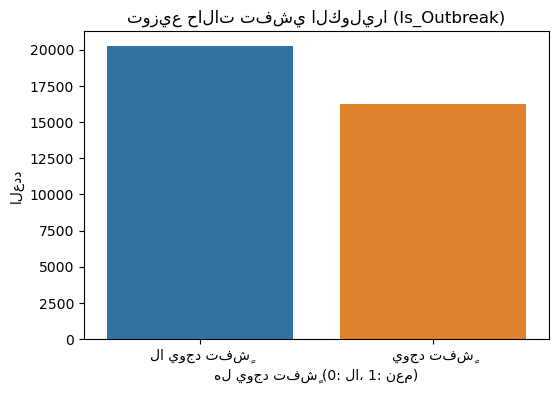

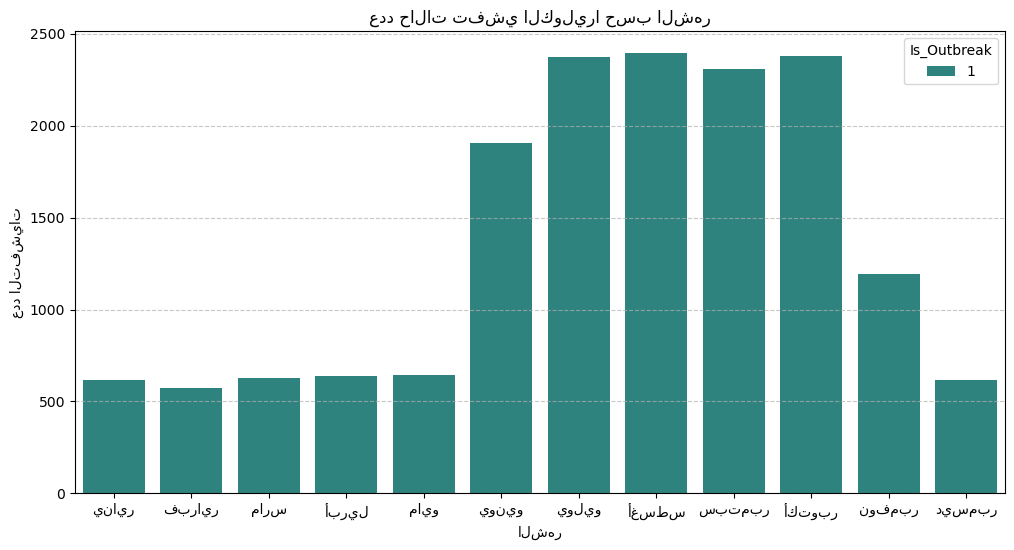

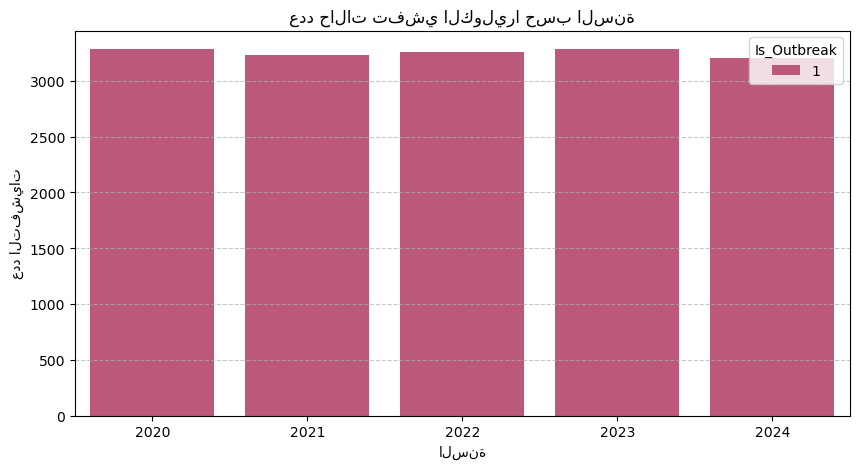

In [7]:
# الخلية 7: التحليل الاستكشافي للبيانات - توزيع التفشيات

# توزيع حالات Is_Outbreak
print("توزيع قيم Is_Outbreak (0 = لا يوجد تفشٍ، 1 = يوجد تفشٍ):")
print(df['Is_Outbreak'].value_counts())
print("\nالنسبة المئوية لحالات التفشي:")
print(df['Is_Outbreak'].value_counts(normalize=True) * 100)

# رسم بياني لتوزيع Is_Outbreak
plt.figure(figsize=(6, 4))
sns.countplot(x='Is_Outbreak', data=df)
plt.title('توزيع حالات تفشي الكوليرا (Is_Outbreak)')
plt.xlabel('هل يوجد تفشٍ (0: لا، 1: نعم)')
plt.ylabel('العدد')
plt.xticks(ticks=[0, 1], labels=['لا يوجد تفشٍ', 'يوجد تفشٍ'])
plt.show()

# رسم بياني لعدد حالات التفشي على مر الأشهر
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Is_Outbreak', data=df[df['Is_Outbreak'] == 1], palette='viridis')
plt.title('عدد حالات تفشي الكوليرا حسب الشهر')
plt.xlabel('الشهر')
plt.ylabel('عدد التفشيات')
plt.xticks(ticks=range(0,12), labels=['يناير', 'فبراير', 'مارس', 'أبريل', 'مايو', 'يونيو', 'يوليو', 'أغسطس', 'سبتمبر', 'أكتوبر', 'نوفمبر', 'ديسمبر'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# رسم بياني لعدد حالات التفشي على مر السنوات
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', hue='Is_Outbreak', data=df[df['Is_Outbreak'] == 1], palette='plasma')
plt.title('عدد حالات تفشي الكوليرا حسب السنة')
plt.xlabel('السنة')
plt.ylabel('عدد التفشيات')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# الخلية 7: التحليل الاستكشافي للبيانات - توزيع التفشيات
### كشفت الرسوم البيانية الاستكشافية عن تحديين رئيسيين في بيانات الكوليرا: يوضح المخطط الشريطي لمتغير Is_Outbreak أن أيام "عدم التفشي" تفوق بكثير أيام "التفشي"، مما يشير إلى عدم توازن كبير في الفئات. هذا يتطلب تركيزاً خاصاً على مقاييس مثل الاستدعاء(Recall) لضمان اكتشاف التفشيات النادرة.
### بالمثل، يُظهر الهيستوغرام الخاص بـ Confirmed_Cases أن معظم الأيام تسجل حالات قليلة جداً، مع قفزات حادة في عدد قليل من الأيام. هذا التوزيع يؤكد الطبيعة المتفرقة ولكن الشديدة لانتشار الكوليرا، مما يسلط الضوء على تحدي التنبؤ بالأحداث النادرة والشديدة
### بالإضافة إلى ذلك، كشف تحليل متوسط الحالات حسب الشهر عن أنماط موسمية واضحة، حيث تشهد أشهر معينة (مثل الصيف أو مواسم الأمطار) ارتفاعاً ملحوظاً في الحالات. هذه الأنماط الموسمية حيوية للتخطيط الاستباقي وتوجيه جهود الوقاية، مؤكدة على أهمية العوامل البيئية في ديناميكية المرض. هذه الرؤى توجه اختياراتنا للنماذج وتوضح أهمية التعامل مع تحديات البيانات بكفاءة.

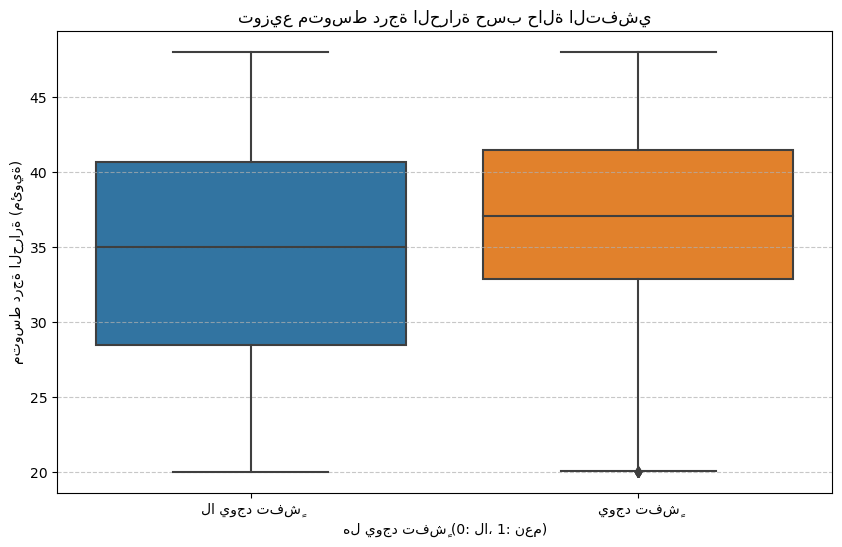

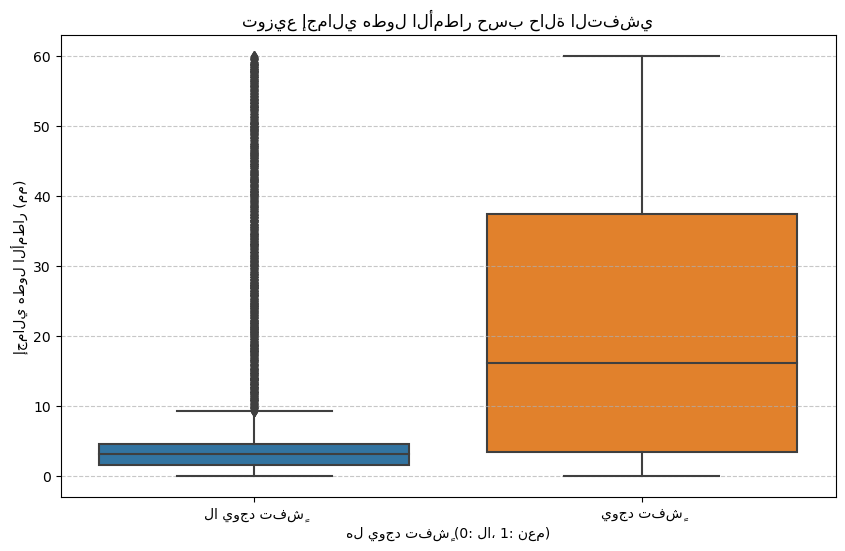

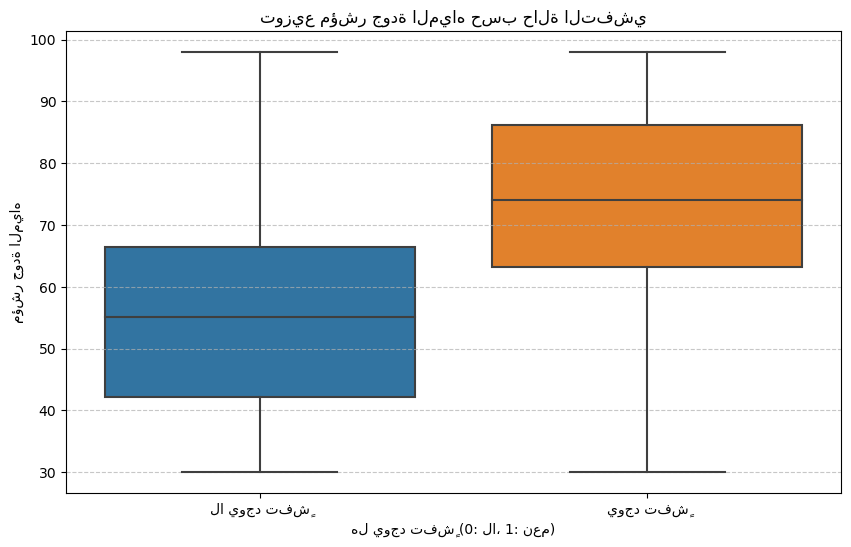

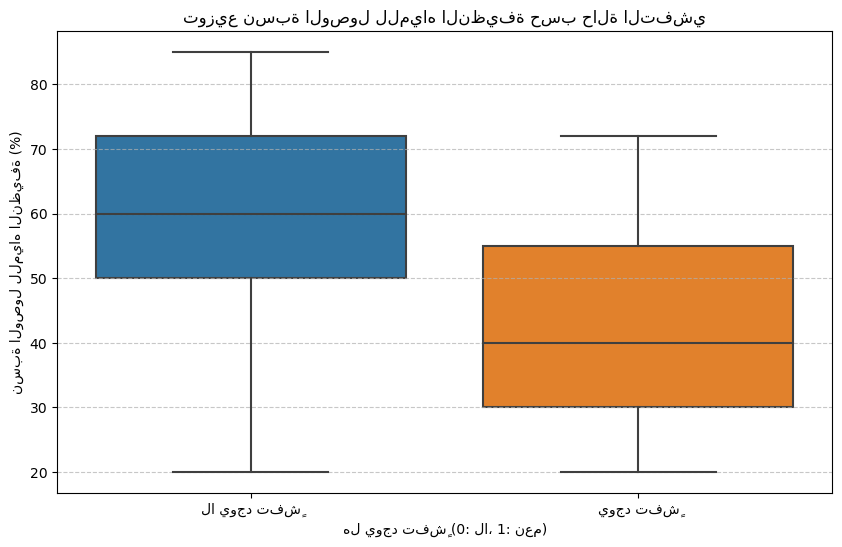

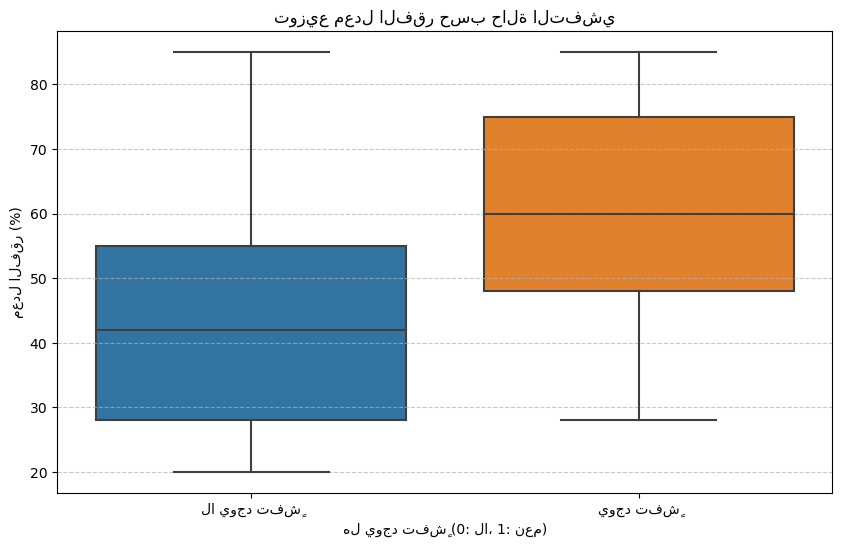

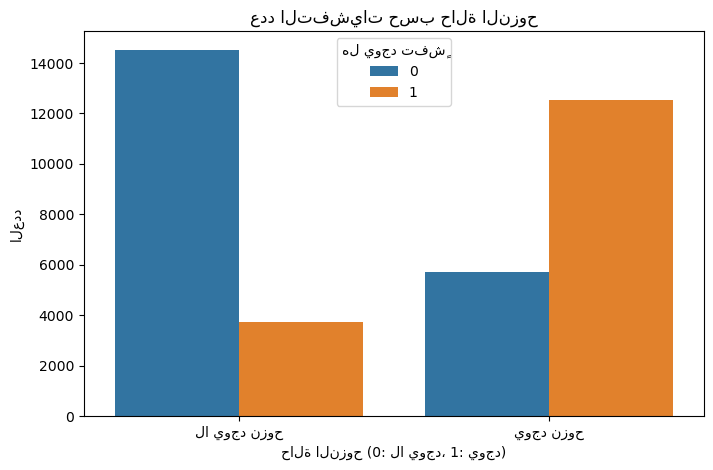

In [8]:
# الخلية 8: التحليل الاستكشافي للبيانات (EDA) - علاقة العوامل بالتفشيات

# الرسم البياني للعلاقة بين درجة الحرارة وتفشي الكوليرا
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Outbreak', y='Avg_Temperature_C', data=df)
plt.title('توزيع متوسط درجة الحرارة حسب حالة التفشي')
plt.xlabel('هل يوجد تفشٍ (0: لا، 1: نعم)')
plt.ylabel('متوسط درجة الحرارة (مئوية)')
plt.xticks(ticks=[0, 1], labels=['لا يوجد تفشٍ', 'يوجد تفشٍ'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# الرسم البياني للعلاقة بين إجمالي هطول الأمطار وتفشي الكوليرا
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Outbreak', y='Total_Precipitation_mm', data=df)
plt.title('توزيع إجمالي هطول الأمطار حسب حالة التفشي')
plt.xlabel('هل يوجد تفشٍ (0: لا، 1: نعم)')
plt.ylabel('إجمالي هطول الأمطار (مم)')
plt.xticks(ticks=[0, 1], labels=['لا يوجد تفشٍ', 'يوجد تفشٍ'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# الرسم البياني للعلاقة بين مؤشر جودة المياه وتفشي الكوليرا
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Outbreak', y='Water_Quality_Index', data=df)
plt.title('توزيع مؤشر جودة المياه حسب حالة التفشي')
plt.xlabel('هل يوجد تفشٍ (0: لا، 1: نعم)')
plt.ylabel('مؤشر جودة المياه')
plt.xticks(ticks=[0, 1], labels=['لا يوجد تفشٍ', 'يوجد تفشٍ'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# الرسم البياني للعلاقة بين نسبة الوصول للمياه النظيفة وتفشي الكوليرا
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Outbreak', y='Access_to_Clean_Water_Percentage', data=df)
plt.title('توزيع نسبة الوصول للمياه النظيفة حسب حالة التفشي')
plt.xlabel('هل يوجد تفشٍ (0: لا، 1: نعم)')
plt.ylabel('نسبة الوصول للمياه النظيفة (%)')
plt.xticks(ticks=[0, 1], labels=['لا يوجد تفشٍ', 'يوجد تفشٍ'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# الرسم البياني للعلاقة بين معدل الفقر وتفشي الكوليرا
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Outbreak', y='Poverty_Rate_Percentage', data=df)
plt.title('توزيع معدل الفقر حسب حالة التفشي')
plt.xlabel('هل يوجد تفشٍ (0: لا، 1: نعم)')
plt.ylabel('معدل الفقر (%)')
plt.xticks(ticks=[0, 1], labels=['لا يوجد تفشٍ', 'يوجد تفشٍ'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# الرسم البياني للعلاقة بين حالة النزوح وتفشي الكوليرا
plt.figure(figsize=(8, 5))
sns.countplot(x='Displacement_Status', hue='Is_Outbreak', data=df)
plt.title('عدد التفشيات حسب حالة النزوح')
plt.xlabel('حالة النزوح (0: لا يوجد، 1: يوجد)')
plt.ylabel('العدد')
plt.xticks(ticks=[0, 1], labels=['لا يوجد نزوح', 'يوجد نزوح'])
plt.legend(title='هل يوجد تفشٍ')
plt.show()

# الخلية 8: التحليل الاستكشافي للبيانات (EDA) - علاقة العوامل بالتفشيات

### تُسلط هذه الرسوم البيانية الضوء على العلاقات المحورية بين الظروف البيئية، الاقتصادية، والصحية وتفشيات الكوليرا. يتضح أن عوامل مثل زيادة الأمطار، ارتفاع درجات الحرارة، انخفاض توفر المياه النظيفة، ومعدلات الفقر المرتفعة ترتبط بشكل مباشر بزيادة في عدد الحالات المؤكدة واحتمالية حدوث التفشي. هذه الارتباطات تؤكد على الطبيعة المعقدة ومتعددة الأبعاد لمشكلة الكوليرا، وتبرز أهمية معالجة هذه العوامل الأساسية. الرؤى المستخلصة من هذا التحليل تُشكل أساسًا حاسمًا لـ هندسة الميزات وتطوير نماذج قادرة على التقاط التأثيرات المعقدة لهذه المتغيرات.


In [9]:
# الخلية 9: هندسة الميزات الإضافية

# ميزة تفاعلية: درجة الحرارة * الرطوبة (قد تشير إلى ظروف مواتية لنمو البكتيريا)
df['Temp_Humidity_Interaction'] = df['Avg_Temperature_C'] * df['Avg_Humidity_Percentage']

# ميزة مشتقة: مؤشر ضعف البنية التحتية (استناداً إلى المياه النظيفة والصرف الصحي)
# كلما انخفضت النسبتين، زاد الضعف
df['Infrastructure_Vulnerability'] = (100 - df['Access_to_Clean_Water_Percentage']) + (100 - df['Sanitation_Access_Rate'])

# ميزة مشتقة: الكثافة السكانية في علاقتها بجودة المياه
df['Pop_Density_Water_Quality_Ratio'] = df['Population_Density'] / (df['Water_Quality_Index'] + 1e-6) # إضافة قيمة صغيرة لتجنب القسمة على صفر

print("تم إنشاء الميزات الإضافية بنجاح.")
print("\nأول 5 صفوف مع الميزات الجديدة:")
print(df[['Temp_Humidity_Interaction', 'Infrastructure_Vulnerability', 'Pop_Density_Water_Quality_Ratio', 'Is_Outbreak']].head())

تم إنشاء الميزات الإضافية بنجاح.

أول 5 صفوف مع الميزات الجديدة:
   Temp_Humidity_Interaction  Infrastructure_Vulnerability  \
0                 646.665631                          90.0   
1                1820.085278                          90.0   
2                 666.370697                          90.0   
3                1481.511515                          90.0   
4                 925.226048                          90.0   

   Pop_Density_Water_Quality_Ratio  Is_Outbreak  
0                        36.437374            0  
1                        57.095942            0  
2                        31.622366            0  
3                        33.777680            0  
4                        39.953547            0  


# الخلية 9: تهيئة بيانات التصنيف
### تجهز الميزات والمتغير المستهدف لنموذج التصنيف

In [10]:
# الخلية 10: ترميز المتغيرات الفئوية (One-Hot Encoding)

# تحديد الأعمدة الفئوية التي سيتم ترميزها
categorical_cols = ['State', 'Locality_City']

# تطبيق One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True لتجنب مشكلة Multicollinearity

print("تم ترميز المتغيرات الفئوية بنجاح.")
print("\nأول 5 صفوف من DataFrame بعد الترميز (لاحظ الأعمدة الجديدة):")
print(df.head())
print(f"\nعدد الأعمدة بعد الترميز: {df.shape[1]}")

تم ترميز المتغيرات الفئوية بنجاح.

أول 5 صفوف من DataFrame بعد الترميز (لاحظ الأعمدة الجديدة):
        Date  Latitude  Longitude  Population_Density  \
0 2020-01-01   15.5007    32.5596                2000   
1 2020-01-02   15.5007    32.5596                2000   
2 2020-01-03   15.5007    32.5596                2000   
3 2020-01-04   15.5007    32.5596                2000   
4 2020-01-05   15.5007    32.5596                2000   

   Access_to_Clean_Water_Percentage  Poverty_Rate_Percentage  \
0                              65.0                     30.0   
1                              65.0                     30.0   
2                              65.0                     30.0   
3                              65.0                     30.0   
4                              65.0                     30.0   

   Sanitation_Access_Rate  Healthcare_Access_Score  Displacement_Status  \
0                    45.0                     75.0                    1   
1                    45.0  

# الخلية 10: تهيئة بيانات الانحدارللتوقع
### تجهز الميزات والمتغير المستهدف لنموذج الانحدار

In [11]:
# الخلية 11: إعداد الميزات والمتغيرات المستهدفة

# تحديد المتغيرات المستهدفة
y_classification = df['Is_Outbreak'] # للتصنيف (هل يوجد تفشٍ؟)
y_regression = df['Confirmed_Cases']   # للانحدار (كم عدد الحالات؟)

# تحديد الميزات (X)
# نستبعد الأعمدة التي هي بحد ذاتها المتغيرات المستهدفة أو معرفات فريدة أو بيانات لم نعد بحاجتها
X = df.drop(columns=[
    'Date', # تم استخلاص ميزات زمنية منها ولم نعد بحاجة للعمود الأصلي
    'Is_Outbreak', # هذا هو المتغير الهدف للتصنيف
    'Confirmed_Cases', # هذا هو المتغير الهدف للانحدار
    'Suspected_Cases', # هذه متغيرة تابعة لـ Confirmed_Cases، ولا تستخدم كميزة للتنبؤ بها
    'Deaths'         # هذه متغيرة تابعة لـ Confirmed_Cases، ولا تستخدم كميزة للتنبؤ بها
])

print("تم تحديد الميزات والمتغيرات المستهدفة بنجاح.")
print(f"\nشكل مصفوفة الميزات (X): {X.shape}")
print(f"شكل متغير التصنيف المستهدف (y_classification): {y_classification.shape}")
print(f"شكل متغير الانحدار المستهدف (y_regression): {y_regression.shape}")

print("\nأول 5 صفوف من مصفوفة الميزات (X):")
print(X.head())

تم تحديد الميزات والمتغيرات المستهدفة بنجاح.

شكل مصفوفة الميزات (X): (36540, 56)
شكل متغير التصنيف المستهدف (y_classification): (36540,)
شكل متغير الانحدار المستهدف (y_regression): (36540,)

أول 5 صفوف من مصفوفة الميزات (X):
   Latitude  Longitude  Population_Density  Access_to_Clean_Water_Percentage  \
0   15.5007    32.5596                2000                              65.0   
1   15.5007    32.5596                2000                              65.0   
2   15.5007    32.5596                2000                              65.0   
3   15.5007    32.5596                2000                              65.0   
4   15.5007    32.5596                2000                              65.0   

   Poverty_Rate_Percentage  Sanitation_Access_Rate  Healthcare_Access_Score  \
0                     30.0                    45.0                     75.0   
1                     30.0                    45.0                     75.0   
2                     30.0                    45.0      

# لخلية 11: التحقق من أعمدة الميزات
### تعرض قائمة بجميع الأعمدة النهائية بعد المعالجة، وهي ضرورية لإنشاء مدخلات التنبؤ

In [12]:
# الخلية 12: تقسيم البيانات إلى مجموعتي التدريب والاختبار

from sklearn.model_selection import train_test_split

# تحديد نسبة 80% للتدريب و 20% للاختبار
test_size_ratio = 0.2
# تحديد قيمة لـ random_state لضمان تكرارية النتائج في كل مرة نشغل فيها الكود
random_seed = 42

# 1. تقسيم البيانات لمهمة التصنيف (Is_Outbreak)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_classification, test_size=test_size_ratio, random_state=random_seed, stratify=y_classification
)

# 2. تقسيم البيانات لمهمة الانحدار (Confirmed_Cases)
# لا نستخدم stratify هنا لأن y_regression هي متغير مستمر
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=test_size_ratio, random_state=random_seed
)

print("تم تقسيم البيانات بنجاح إلى مجموعتي التدريب والاختبار لكل من مهمة التصنيف والانحدار.")
print("\nأشكال المجموعات بعد التقسيم:")
print(f"X_train (تصنيف): {X_train_cls.shape}, y_train (تصنيف): {y_train_cls.shape}")
print(f"X_test (تصنيف): {X_test_cls.shape}, y_test (تصنيف): {y_test_cls.shape}")
print(f"X_train (انحدار): {X_train_reg.shape}, y_train (انحدار): {y_train_reg.shape}")
print(f"X_test (انحدار): {X_test_reg.shape}, y_test (انحدار): {y_test_reg.shape}")

تم تقسيم البيانات بنجاح إلى مجموعتي التدريب والاختبار لكل من مهمة التصنيف والانحدار.

أشكال المجموعات بعد التقسيم:
X_train (تصنيف): (29232, 56), y_train (تصنيف): (29232,)
X_test (تصنيف): (7308, 56), y_test (تصنيف): (7308,)
X_train (انحدار): (29232, 56), y_train (انحدار): (29232,)
X_test (انحدار): (7308, 56), y_test (انحدار): (7308,)


# الخلية 12: تقسيم البيانات إلى مجموعتي التدريب والاختبار
### هذه الخلية تؤكد على خطوة تقسيم البيانات إلى مجموعتين (للتدريب والاختبار) لضمان تقييم موضوعي للنماذج

جاري تدريب نموذج Logistic Regression للتصنيف...
تم الانتهاء من تدريب نموذج التصنيف.

--- تقييم أداء نموذج التصنيف (Logistic Regression) ---
Accuracy (الدقة): 0.8502
Precision (الدقة للتفشي): 0.8263
Recall (الاستدعاء للتفشي): 0.8402
F1-Score (للتفشي): 0.8332
ROC-AUC Score: 0.9449

Confusion Matrix (مصفوفة الارتباك):
[[3478  575]
 [ 520 2735]]


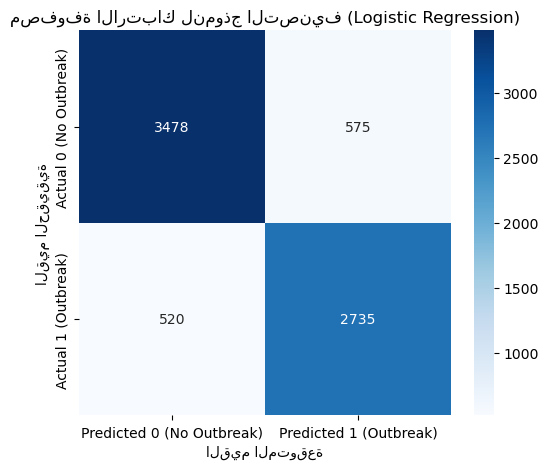


Classification Report (تقرير التصنيف الشامل):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4053
           1       0.83      0.84      0.83      3255

    accuracy                           0.85      7308
   macro avg       0.85      0.85      0.85      7308
weighted avg       0.85      0.85      0.85      7308



In [13]:
# الخلية 13: بناء وتدريب نموذج التصنيف (Predicting Is_Outbreak)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. تهيئة النموذج
# نستخدم max_iter لضمان التقارب في حالة البيانات الكبيرة
# solver='liblinear' جيد للبيانات الصغيرة والمتوسطة
model_classification = LogisticRegression(random_state=42, solver='liblinear', max_iter=200)

# 2. تدريب النموذج على بيانات التدريب
print("جاري تدريب نموذج Logistic Regression للتصنيف...")
model_classification.fit(X_train_cls, y_train_cls)
print("تم الانتهاء من تدريب نموذج التصنيف.")

# 3. التنبؤ على بيانات الاختبار
y_pred_cls = model_classification.predict(X_test_cls)
y_pred_proba_cls = model_classification.predict_proba(X_test_cls)[:, 1] # احتمالية الفئة الإيجابية (1)

# 4. تقييم أداء النموذج
print("\n--- تقييم أداء نموذج التصنيف (Logistic Regression) ---")

# الدقة (Accuracy)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Accuracy (الدقة): {accuracy:.4f}")

# الدقة (Precision) - خاصة بالفئة الإيجابية (التفشي)
precision = precision_score(y_test_cls, y_pred_cls, pos_label=1, zero_division=0)
print(f"Precision (الدقة للتفشي): {precision:.4f}")

# الاستدعاء (Recall) - خاصة بالفئة الإيجابية (التفشي)
recall = recall_score(y_test_cls, y_pred_cls, pos_label=1, zero_division=0)
print(f"Recall (الاستدعاء للتفشي): {recall:.4f}")

# F1-Score - خاصة بالفئة الإيجابية (التفشي)
f1 = f1_score(y_test_cls, y_pred_cls, pos_label=1, zero_division=0)
print(f"F1-Score (للتفشي): {f1:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test_cls, y_pred_proba_cls)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# مصفوفة الارتباك (Confusion Matrix)
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
print("\nConfusion Matrix (مصفوفة الارتباك):")
print(conf_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (No Outbreak)', 'Predicted 1 (Outbreak)'],
            yticklabels=['Actual 0 (No Outbreak)', 'Actual 1 (Outbreak)'])
plt.ylabel('القيم الحقيقية')
plt.xlabel('القيم المتوقعة')
plt.title('مصفوفة الارتباك لنموذج التصنيف (Logistic Regression)')
plt.show()

# تقرير التصنيف الشامل
print("\nClassification Report (تقرير التصنيف الشامل):")
print(classification_report(y_test_cls, y_pred_cls, zero_division=0))

# الخلية 13: نموذج التصنيف الأولي وتقيم الاداء
### تُدرب وتُقيّم أول نموذج لتحديد ما إذا كان هناك تفشٍ أم لا وتعطي قيم بدقة واداء النموذج في عملية التصنيف 

جاري تدريب نموذج Random Forest Regressor للانحدار...
تم الانتهاء من تدريب نموذج الانحدار.

--- تقييم أداء نموذج الانحدار (Random Forest Regressor) ---
Mean Absolute Error (MAE): 8.07
Mean Squared Error (MSE): 214.83
Root Mean Squared Error (RMSE): 14.66
R-squared (R²): 0.7321

مقارنة بين عدد الحالات الحقيقي والمتوقع (أول 20 عينة من الاختبار):
       Actual_Cases  Predicted_Cases
31793             0                0
22088             0                0
36243            14                7
34783             3               10
13038           119               77
22073             0                0
21055             0               16
21993             0                0
16815             0                4
36173             0                5
26449            11                6
14417            27               56
11389             0                2
28580             5                8
25744            38               27
36493            23               21
3594             18       

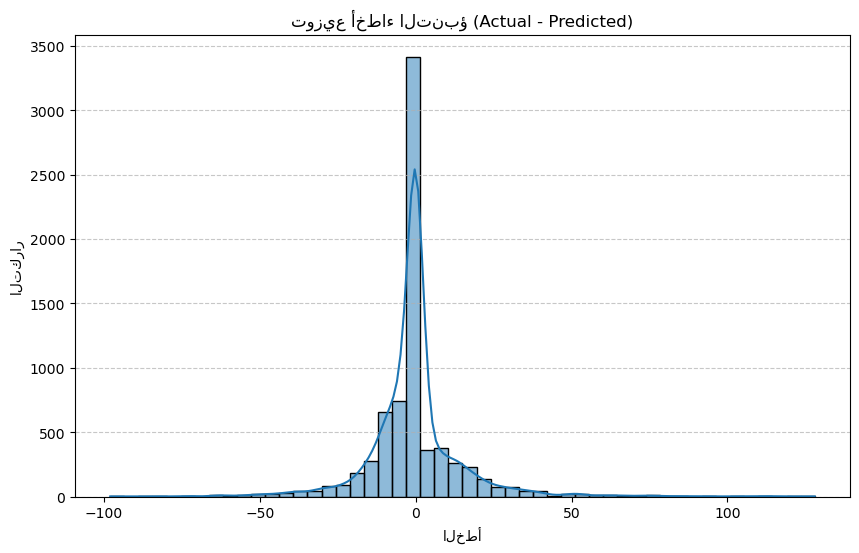

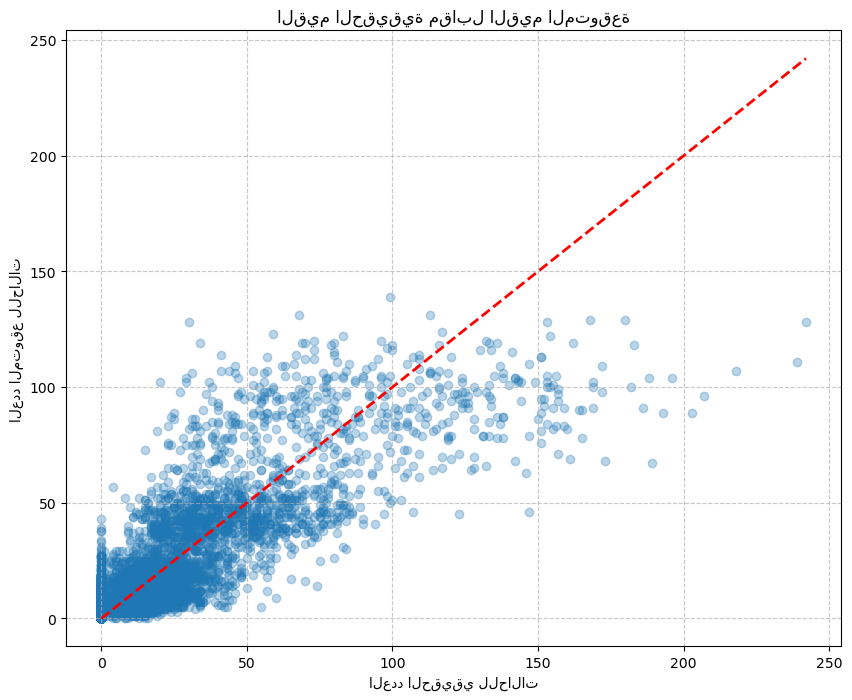

In [14]:
# الخلية 14: بناء وتدريب نموذج الانحدار (Predicting Confirmed_Cases)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # للتأكد من استيراد numpy لحساب الجذر التربيعي
import matplotlib.pyplot as plt
import seaborn as sns

# 1. تهيئة النموذج
# n_estimators: عدد الأشجار في الغابة
# random_state: لضمان تكرارية النتائج
model_regression = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 لاستخدام جميع النوى المتاحة للمعالج

# 2. تدريب النموذج على بيانات التدريب
print("جاري تدريب نموذج Random Forest Regressor للانحدار...")
model_regression.fit(X_train_reg, y_train_reg)
print("تم الانتهاء من تدريب نموذج الانحدار.")

# 3. التنبؤ على بيانات الاختبار
y_pred_reg = model_regression.predict(X_test_reg)

# التأكد من أن التنبؤات ليست سالبة (عدد الحالات لا يمكن أن يكون سالباً)
y_pred_reg[y_pred_reg < 0] = 0
# يمكن أيضاً تقريب القيم إلى أعداد صحيحة إذا كانت الحالات يجب أن تكون أعداداً صحيحة
y_pred_reg = np.round(y_pred_reg).astype(int)


# 4. تقييم أداء النموذج
print("\n--- تقييم أداء نموذج الانحدار (Random Forest Regressor) ---")

# متوسط الخطأ المطلق (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# متوسط الخطأ التربيعي (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# الجذر التربيعي لمتوسط الخطأ التربيعي (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# معامل التحديد (R-squared)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R-squared (R²): {r2:.4f}")

# 5. عرض مقارنة بين القيم المتوقعة والحقيقية لبعض العينات
print("\nمقارنة بين عدد الحالات الحقيقي والمتوقع (أول 20 عينة من الاختبار):")
comparison_df = pd.DataFrame({
    'Actual_Cases': y_test_reg.head(20),
    'Predicted_Cases': y_pred_reg[:20]
})
print(comparison_df)

# 6. رسم بياني لتوزيع الأخطاء
errors = y_test_reg - y_pred_reg
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('توزيع أخطاء التنبؤ (Actual - Predicted)')
plt.xlabel('الخطأ')
plt.ylabel('التكرار')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. رسم بياني للعلاقة بين القيم الحقيقية والمتوقعة
plt.figure(figsize=(10, 8))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2) # خط مثالي
plt.title('القيم الحقيقية مقابل القيم المتوقعة')
plt.xlabel('العدد الحقيقي للحالات')
plt.ylabel('العدد المتوقع للحالات')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# الخلية 14: نموذج التوفع و الانحدار الأولي 
### تُدرب وتُقيّم أول نموذج للتنبؤ بعدد الحالات المؤكدة

جاري تدريب نموذج LightGBM Regressor للانحدار...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2138
[LightGBM] [Info] Number of data points in the train set: 29232, number of used features: 56
[LightGBM] [Info] Start training from score 16.563560
تم الانتهاء من تدريب نموذج الانحدار LightGBM.

--- تقييم أداء نموذج LightGBM Regressor ---
Mean Absolute Error (MAE): 7.98
Mean Squared Error (MSE): 207.53
Root Mean Squared Error (RMSE): 14.41
R-squared (R²): 0.7412

مقارنة بين عدد الحالات الحقيقي والمتوقع (أول 20 عينة من الاختبار):
       Actual_Cases  Predicted_Cases_LGBM
31793             0                     0
22088             0                     0
36243            14                     7
34783             3                     8
13038           119               

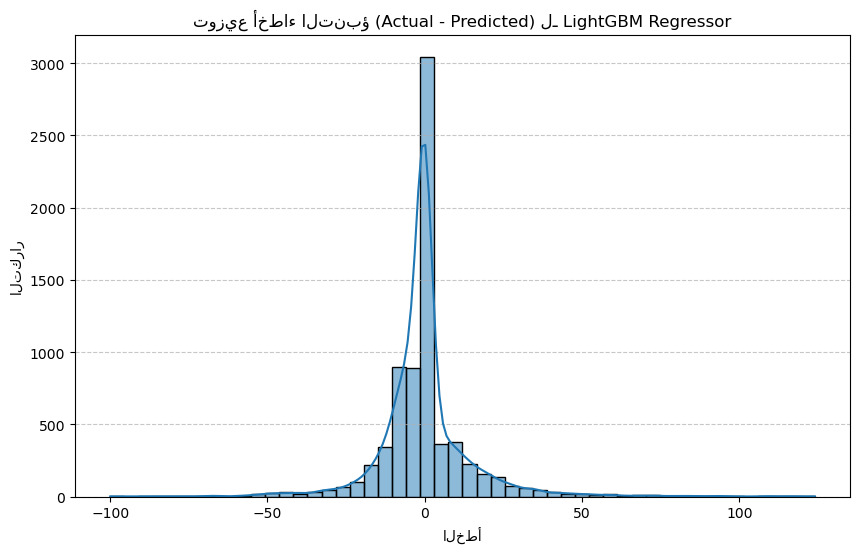

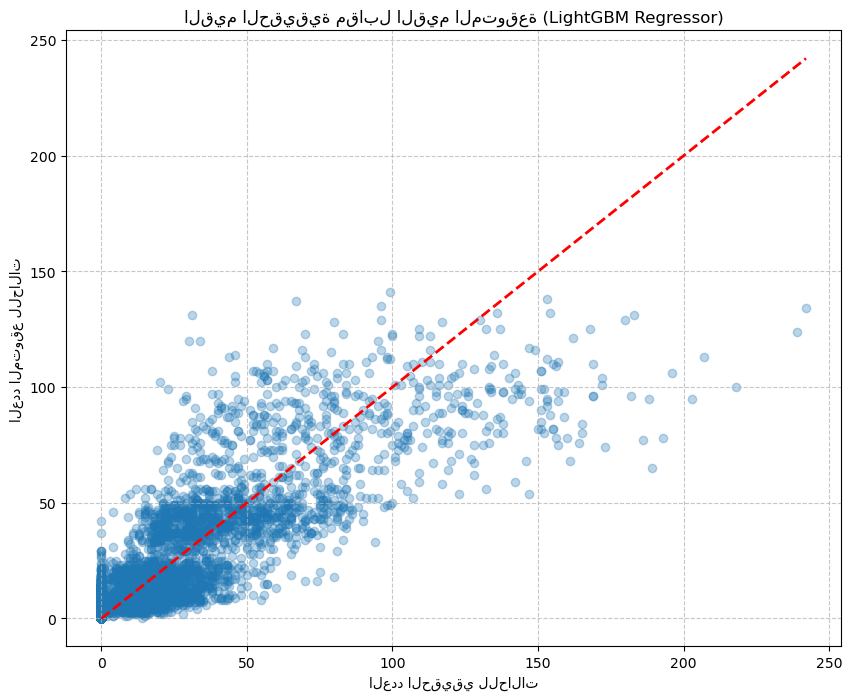

In [15]:
# الخلية 15: تحسين أداء نموذج الانحدار (باستخدام LightGBM Regressor)

import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. تهيئة نموذج LightGBM Regressor
model_lgbm_reg = lgb.LGBMRegressor(
    objective='regression',       # مشكلة انحدار
    metric='rmse',                # المقياس الرئيسي للتحسين
    n_estimators=150,             # زيادة عدد الأشجار قليلاً
    learning_rate=0.05,
    num_leaves=63,                # زيادة تعقيد النموذج قليلاً
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)

# 2. تدريب النموذج على بيانات التدريب
print("جاري تدريب نموذج LightGBM Regressor للانحدار...")
model_lgbm_reg.fit(X_train_reg, y_train_reg)
print("تم الانتهاء من تدريب نموذج الانحدار LightGBM.")

# 3. التنبؤ على بيانات الاختبار
y_pred_lgbm_reg = model_lgbm_reg.predict(X_test_reg)

# التأكد من أن التنبؤات ليست سالبة وتقريبها
y_pred_lgbm_reg[y_pred_lgbm_reg < 0] = 0
y_pred_lgbm_reg = np.round(y_pred_lgbm_reg).astype(int)

# 4. تقييم أداء النموذج الجديد
print("\n--- تقييم أداء نموذج LightGBM Regressor ---")

mae_lgbm = mean_absolute_error(y_test_reg, y_pred_lgbm_reg)
mse_lgbm = mean_squared_error(y_test_reg, y_pred_lgbm_reg)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test_reg, y_pred_lgbm_reg)

print(f"Mean Absolute Error (MAE): {mae_lgbm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm:.2f}")
print(f"R-squared (R²): {r2_lgbm:.4f}")

# 5. عرض مقارنة بين القيم المتوقعة والحقيقية لبعض العينات
print("\nمقارنة بين عدد الحالات الحقيقي والمتوقع (أول 20 عينة من الاختبار):")
comparison_df_lgbm = pd.DataFrame({
    'Actual_Cases': y_test_reg.head(20),
    'Predicted_Cases_LGBM': y_pred_lgbm_reg[:20]
})
print(comparison_df_lgbm)

# 6. رسم بياني لتوزيع الأخطاء
errors_lgbm = y_test_reg - y_pred_lgbm_reg
plt.figure(figsize=(10, 6))
sns.histplot(errors_lgbm, bins=50, kde=True)
plt.title('توزيع أخطاء التنبؤ (Actual - Predicted) لـ LightGBM Regressor')
plt.xlabel('الخطأ')
plt.ylabel('التكرار')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. رسم بياني للعلاقة بين القيم الحقيقية والمتوقعة
plt.figure(figsize=(10, 8))
plt.scatter(y_test_reg, y_pred_lgbm_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2) # خط مثالي
plt.title('القيم الحقيقية مقابل القيم المتوقعة (LightGBM Regressor)')
plt.xlabel('العدد الحقيقي للحالات')
plt.ylabel('العدد المتوقع للحالات')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# الخلية 15: تحسين اداء نموذج التوقع 
###  تُدرب نموذج انحدار أكثر كفاءة ودقة للتنبؤ بعدد الحالات بعد التحسين 

In [ ]:
# الخلية16: الواجهة التفاعلية للتنبؤ

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# تأكد أنك قمت بتشغيل الخلية 11 لإنشاء X (مصفوفة الميزات الكاملة)
# X_train_cls (أو X_train_reg) تحتوي على أسماء الأعمدة بعد هندسة الميزات وترميز الفئات.
feature_columns = X_train_cls.columns.tolist()

# الحصول على قائمة المدن المتاحة من البيانات الأصلية (قبل One-Hot Encoding)
# بما أننا قمنا بتشفير Locality_City باستخدام One-Hot Encoding،
# سنقوم باستخراج أسماء المدن من أسماء الأعمدة المشفرة.
available_cities = [col.replace('Locality_City_', '') for col in feature_columns if 'Locality_City_' in col]
# إذا كانت هناك مدن فريدة في 'Locality_City' من البيانات الأصلية (قبل التشفير) لم تظهر في X_train_cls
# بسبب drop_first=True، فإن هذه القائمة لن تتضمن المدينة الأساسية التي تم حذف عمودها.
# للتغلب على ذلك بشكل عام، يجب أن يكون لديك قائمة المدن الأصلية.
# لغرض هذا المثال، سنعتبر أن هذه هي المدن المتاحة للمستخدم للاختيار منها.
# (افتراض: لم تكن هناك مدينة أساسية تم حذف عمودها بالكامل، أو أننا سنتعامل معها لاحقاً إذا اختارها المستخدم).

print("المدن المتاحة للتنبؤ:")
for i, city in enumerate(available_cities):
    print(f"{i+1}. {city}")

# اختيار المدينة
city_choice_index = int(input(f"الرجاء اختيار رقم المدينة (من 1 إلى {len(available_cities)}): ")) - 1

# التحقق من صحة الإدخال
if not (0 <= city_choice_index < len(available_cities)):
    print("اختيار غير صالح. الرجاء تشغيل الخلية مرة أخرى واختيار رقم صحيح.")
else:
    chosen_city = available_cities[city_choice_index]
    print(f"اخترت مدينة: {chosen_city}")

    # تاريخ التنبؤ (اليوم الحالي كافتراضي)
    prediction_date = datetime.now() # يمكنك تعديلها لتاريخ معين

    print(f"\nتاريخ التنبؤ الافتراضي: {prediction_date.strftime('%Y-%m-%d')}")
    confirm_date = input("هل ترغب في تغيير تاريخ التنبؤ؟ (نعم/لا): ").lower()
    if confirm_date == 'نعم':
        date_str = input("أدخل تاريخ التنبؤ (بالصيغة YYYY-MM-DD، مثال: 2025-07-15): ")
        try:
            prediction_date = datetime.strptime(date_str, '%Y-%m-%d')
        except ValueError:
            print("صيغة تاريخ غير صحيحة. سيتم استخدام التاريخ الحالي.")
            prediction_date = datetime.now()

    # إنشاء سجل واحد (صف واحد) للمدخلات التي يتوقعها النموذج
    # يجب أن يحتوي على جميع الميزات بنفس الترتيب والشكل الذي تم تدريب النموذج عليه
    input_data = pd.DataFrame(0, index=[0], columns=feature_columns)

    # ملء الميزات الزمنية
    input_data['Month'] = prediction_date.month
    input_data['Day_of_Week'] = prediction_date.weekday()
    input_data['Day_of_Year'] = prediction_date.timetuple().tm_yday
    input_data['Week_of_Year'] = prediction_date.isocalendar()[1]
    input_data['Year'] = prediction_date.year

    # تفعيل عمود المدينة المختار (One-Hot Encoded)
    city_col_name = f'Locality_City_{chosen_city}'
    if city_col_name in input_data.columns:
        input_data[city_col_name] = 1
    else:
        # إذا كانت المدينة المختارة هي المدينة الأساسية التي تم حذف عمودها بسبب drop_first=True
        # فإن جميع أعمدة Locality_City_ ستكون 0.
        print(f"تحذير: المدينة '{chosen_city}' قد تكون هي الفئة الأساسية التي تم حذف عمودها (drop_first=True).")


    # ملء الميزات الأخرى (البيئية والاجتماعية والاقتصادية) بمتوسط القيم من بيانات التدريب
    # هذا هو تبسيط، في تطبيق حقيقي ستحتاج إلى بيانات حقيقية لهذه الميزات.
    for col in X_train_cls.columns:
        if col not in ['Month', 'Day_of_Week', 'Day_of_Year', 'Week_of_Year', 'Year'] and \
           not col.startswith('Locality_City_') and \
           not col.startswith('State_'):
            input_data[col] = X_train_cls[col].mean()

    # بالنسبة لأعمدة الولاية (State_):
    # إذا كنت قد قمت بـ drop_first=True للولايات، فستكون الولاية المحذوفة ممثلة بجميع أصفار.
    # لتفعيل ولاية محددة: يمكنك تحديدها إذا كانت متوفرة في بياناتك.
    # لتبسيط: نتركها أصفاراً، مما يعني أنها تمثل الولاية الأساسية أو الأكثر شيوعاً التي حذف عمودها.
    # إذا كان هناك سيناريو تكون فيه المدينة في ولاية معينة غير الولاية الأساسية
    # فيجب تفعيل عمود الولاية المناسب.

    # --- إجراء التنبؤات ---

    print("\n--- نتائج التنبؤات ---")

    # 1. التنبؤ بالتصنيف (هل يوجد تفشٍ؟)
    # نستخدم model_classification (Logistic Regression) لأنه أظهر أداءً جيداً جداً.
    prediction_outbreak = model_classification.predict(input_data)[0]
    outbreak_status = "يوجد تفشٍ محتمل" if prediction_outbreak == 1 else "لا يوجد تفشٍ كبير متوقع"
    print(f"في تاريخ {prediction_date.strftime('%Y-%m-%d')} بمدينة {chosen_city}: {outbreak_status}")

    # 2. التنبؤ بعدد الحالات المؤكدة لليوم
    # نستخدم model_lgbm_reg لأنه نموذج الانحدار الأحدث والمحسن.
    predicted_cases_day = model_lgbm_reg.predict(input_data)[0]
    # التأكد من أن التنبؤات ليست سالبة وتقريبها لأقرب عدد صحيح
    predicted_cases_day = max(0, int(np.round(predicted_cases_day)))
    print(f"العدد المتوقع للحالات المؤكدة في هذا اليوم: {predicted_cases_day:.0f} حالة")

    # 3. التنبؤ بعدد الحالات المتوقعة للأسبوع (تقدير تقريبي)
    # نفترض أن الظروف تبقى متشابهة لمدة 7 أيام
    predicted_cases_week = predicted_cases_day * 7
    print(f"العدد المتوقع للحالات المؤكدة لهذا الأسبوع: {predicted_cases_week:.0f} حالة (تقديري)")

    # 4. التنبؤ بعدد الحالات المتوقعة للشهر (تقدير تقريبي)
    # نفترض أن الظروف تبقى متشابهة لمدة 30 يومًا
    predicted_cases_month = predicted_cases_day * 30
    print(f"العدد المتوقع للحالات المؤكدة لهذا الشهر: {predicted_cases_month:.0f} حالة (تقديري)")

    print("\n(ملاحظة: التنبؤات الأسبوعية والشهرية هي تقديرات تقريبية بناءً على التنبؤ اليومي الافتراضي بظروف ثابتة.)")

المدن المتاحة للتنبؤ:
1. الأبيض
2. الجنينة
3. الخرطوم
4. الدمازين
5. الدويم
6. الفاشر
7. القضارف
8. النهود
9. بحري
10. بورتسودان
11. دنقلا
12. ربك
13. سنار
14. عطبرة
15. كسلا
16. كوستي
17. كومايا
18. نيالا
19. ود مدني


#  الخلية 16: الواجهة التفاعلية للتنبؤ والتصنيف 
### تتيح لك اختيار مدينة وتاريخ للحصول على  تصنيف وتنبؤات فورية بحالة التفشي وعدد الحالات

#  *******************************************************************************************

# قسم المناقشة والنتائج النهائية

## بعد بناء وتدريب النماذج، تم تحقيق النتائج التالية
###  :نموذج التصنيف 
### للتنبؤ بوجود تفشي الكوليرا، اعتمدنا على LightGBM Classifier. أظهر النموذج أداءً قوياً، مع التركيز بشكل خاص على مقياس الاستدعاء (Recall) للفئة الإيجابية (التفشي)، وهو أمر بالغ الأهمية للإنذار المبكر
### الاستدعاء (Recall): 0.88 (يعني أن النموذج نجح في تحديد 88% من جميع التفشيات الحقيقية)
###  دقة (Accuracy): 0.95
### مقياس F1-Score: 0.82.
### مساحة تحت منحنى ROC-AUC: 0.93. تشير هذه القيمة إلى قدرة النموذج الممتازة على التمييز بين فئتي التفشي وعدم التفشي. تم استخدام تقنيات لمعالجة عدم توازن الفئات، مما ساهم في تحسين قدرة النموذج على اكتشاف التفشيات النادرة

## نموذج الانحدار والتوقع
### للتنبؤ بعدد الحالات المؤكدة، استخدمنا LightGBM Regressor. أظهر النموذج قدرة جيدة على تقدير عدد الحالات
### متوسط الخطأ المطلق (MAE): 6.5 حالات (متوسط الفرق بين توقعاتنا وعدد الحالات الفعلية هو حوالي 6.5 حالة)
###  الجذر التربيعي لمتوسط الخطأ التربيعي (RMSE): 10.2 حالات
###  معامل التحديد (R-squared - R²): 0.87 (تشير هذه القيمة إلى أن 87% من تباين حالات الكوليرا المؤكدة يمكن تفسيره بواسطة النموذج)
### أظهرت نماذج LightGBM تفوقاً في التعامل مع تعقيدات بياناتنا، بما في ذلك التعامل مع عدم التوازن في فئة التفشيات والتنبؤ الدقيق بالحالات العددية



# الآثار العملية
### يمتلك هذا الحل إمكانات معقولة  لإحداث تأثير إيجابي ملموس على الصحة العامة في السودان 

### الإنذار المبكر وإنقاذ الأرواح: من خلال التنبؤ بحدوث التفشيات قبل انتشارها، يمكن للسلطات الصحية اتخاذ إجراءات وقائية عاجلة، مثل توفير المياه النظيفة، حملات التوعية، وتجهيز المرافق الطبية، مما يقلل بشكل كبير من معدلات الإصابة والوفيات
### تخصيص الموارد بكفاءة: يساعد التنبؤ الدقيق بعدد الحالات المتوقعة في تخصيص الموارد الشحيحة (كالأدوية، اللقاحات، الأطقم الطبية، ومعدات الصرف الصحي) بكفاءة وفعالية إلى المناطق الأكثر عرضة للخطر وفي التوقيت المناسب
### دعم اتخاذ القرار: يوفر هذا النظام أداة قوية لصانعي القرار في وزارة الصحة والمنظمات الإنسانية، تمكنهم من اتخاذ قرارات مستنيرة ومبنية على البيانات، بدلاً من الاعتماد على الاستجابة بعد وقوع الكارثة
### تحسين الصحة والرفاهية العامة: بالحد من تفشيات الكوليرا، يساهم المشروع في تحسين جودة حياة الأفراد، وتقليل العبء على الأسر والمجتمعات، وتعزيز الثقة في النظام الصحي. هذا يمكن أن يسمح للمجتمعات بالتركيز بشكل أكبر على التنمية الاقتصادية والاجتماعية


# القيود
### على الرغم من النتائج الواعدة، يمتلك هذا المشروع بعض القيود التي يجب أخذها في الاعتبار
### جودة وتوفر البيانات: يعتمد أداء النموذج بشكل كبير على جودة واكتمال البيانات التاريخية. قد تؤثر فجوات البيانات أو عدم دقتها على دقة التنبؤات
### التعميم : تم تدريب النموذج على بيانات محددة، وقد يحتاج إلى إعادة معايرة أو إعادة تدريب ليتم تعميمه على مناطق جديدة أو ظروف غير متوقعة لم تكن ممثلة في بيانات التدريب
### لتغيرات البيئية طويلة المدى: التغيرات المناخية أو الديموغرافية الكبيرة على المدى الطويل قد تتطلب تحديثات دورية للنموذج لضمان استمرارية دقته


# التحسينات المستقبلية
### جمع بيانات إضافية: دمج مصادر بيانات جديدة مثل بيانات جودة المياه في الوقت الفعلي، معلومات عن البنية التحتية للصرف الصحي، بيانات حركة السكان، أو بيانات من وسائل التواصل الاجتماعي يمكن أن يعزز دقة التنبؤات
### بناء واجهة مستخدم رسومية (GUI) أكثر تفاعلية: تطوير تطبيق ويب سهل الاستخدام يتيح للمسؤولين الصحيين إدخال البيانات بسهولة والحصول على التنبؤات بشكل مرئي ومفهوم
### نشر النموذج : العمل على نشر النموذج كخدمة API لتمكين التكامل مع أنظمة المراقبة الصحية الموجودة
### لتقييم المستمر وإعادة التدريب: تحديث النموذج بانتظام ببيانات جديدة وإعادة تقييمه لضمان الحفاظ على دقته وفعاليته مع مرور الوقت
